%%html
<style>
table {float:left}
</style>

# Statistics

## Inferential Statistics

1. [Inferential Statistics.](#1)<br>
1.1. [Normal Distribution & Standard Normal Distribution.](#11)<br>
1.2. [Central Limit Theorem.](#12)<br>
1.3. [Estimators and estimates.](#13)<br>
2. [Confidence Intervals.](#2)<br>
2.1. [CI Population variance known, z-score.](#21)<br>
2.2. [CI Population variance unknown, t-score.](#22)<br>
2.3. [CI Difference of two means, dependent samples, variance unknown.](#23)<br>
2.4. [CI for the difference of two means. Independent samples, variance known.](#24)<br>
2.5. [CI for difference of two means; independent samples, variances unknown but assumed to be equal.](#25)<br>
3. [Inferential Statistics Practical Example.](#3)<br>


In [1]:
# importing packages
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pandas as pd 
import seaborn as sns
import numpy as np
import math
import warnings
from scipy import stats
warnings.filterwarnings("ignore")
sns.set(style = 'whitegrid')
%matplotlib inline

***
## <a class="anchor" id="1">Part 1: Inferential Statistics</a>

| Word |  | Definition |
| :- | :-: | :- |
| distribution | - | A function that shows the possible values for a variable and the probability of their occurrence. |

### <a class="anchor" id="11">Part 1.1: Normal Distribution & Standard Normal Distribution</a>

## 
| Word |  | Definition |
| :- | :-: | :- |
| Bell curve | - | A common name for the normal distribution. |
| Gaussian distribution | - | The original name of the normal distribution. Named after the famous mathematician Gauss, who was the first to explore it through his work on the Gaussian function. |
| to control for the mean/std/etc | - | While holding a particular value constant, we change the other variables and observe the effect. |
| standard normal distribution | - | A normal distribution with a mean of 0, and a standard deviation of 1 |
| z-statistic | - | The statistic associated with the normal distribution |
| standardized variable | - | A variable which has been standardized using the z-score formula - by first subtracting the mean and then dividing by the standard deviation |


### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| standarization | z = (x-μ)/σ | first subtracting the mean and then dividing by the standard deviation |

In [2]:
'''
Background	You are given an approximately normally distributed dataset
Task 1	Calculate the mean and standard deviation of the dataset
Task 2	Standardize the dataset
Task 3	Plot the data on a graph to see the change
'''
# reading in the data
df = pd.read_csv('Data/Standard_Normal_Distribution.csv')
df.head()

,Original dataset
0,567.45
1,572.45
2,572.45
3,589.12
4,613.87


In [3]:
# Task 1
# caclulating mean
df_mean = df['Original dataset'].mean()
# calculating standard deviation
df_std = df['Original dataset'].std()
print('Mean:', df_mean)
print('Std: ', df_std)

Mean: 743.0269999999998
Std:  73.95317208728879


In [4]:
# standarizing the data
df['Standarized'] = df['Original dataset'].apply(lambda x: (x-df_mean)/df_std)
df.head()

,Original dataset,Standarized
0,567.45,-2.374165
1,572.45,-2.306554
2,572.45,-2.306554
3,589.12,-2.081141
4,613.87,-1.746470


In [5]:
# checking mean
print('Standarized mean: ', int(df['Standarized'].mean()))
# checking standard deviation
print('Standarized std: ', int(df['Standarized'].std()))

Standarized mean:  0
Standarized std:  1


Text(0.5, 1.0, 'Standarized Data')

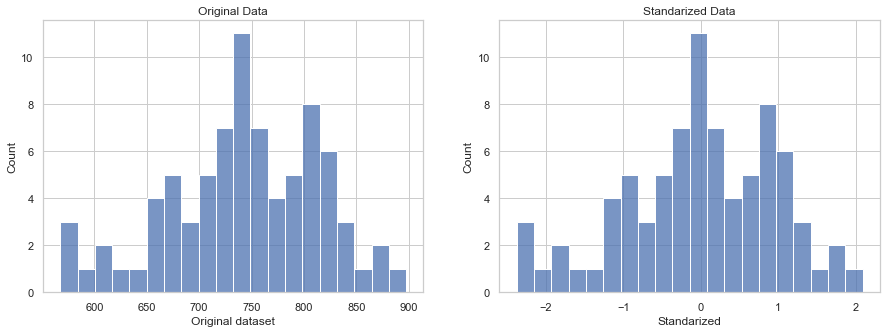

In [6]:
# creating distribution plot
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.histplot(ax = axes[0]
            ,data = df
            ,x = 'Original dataset'
            ,bins = 20).set_title('Original Data')
sns.histplot(ax = axes[1]
            ,data = df
            ,x = 'Standarized'
            ,bins = 20).set_title('Standarized Data')

### <a class="anchor" id="12">Part 1.2: Central Limit Theorem.</a>

| Word |  | Definition |
| :- | :-: | :- |
| central limit theorem | - | No matter the distribution of the underlying dataset, the sampling distribution of the means of the dataset approximate a normal distribution. |
| sampling distribution | - | the distribution of a sample. |
| standard error | - | the standard error is the standard deviation of the sampling distribution. It takes the size of the sample into account |


### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| standard error | se = σ/sqrt(n)| standard deviation divded by sample size |

### <a class="anchor" id="13">Part 1.3: Estimators and estimates.</a>

| Word |  | Definition |
| :- | :-: | :- |
| estimator | - | Estimations we make according to a function or rule |
| estimate | - | The particular value that was estimated through an estimator. |
| bias | - | An unbiased estimator has an expected value the population parameter. A biased one has an expected value different from the population parameter. The bias is the deviation from the true value. |
| efficiency (in estimators) | - | in the context of estimators, the efficiency loosely refers to 'lack of variability'. The most efficient estimator is the one with the least variability. It is a comparative measure, e.g. one estimator is more efficient than another. |
| point estimator | - | A function or a rule, according to which we make estimations that will result in a single number. |
| point estimate | - | A single number that is derived from a certain point estimator.  |
| interval estimator | - | A function or a rule, according to which we make estimations that will result in an interval. In this course, we will only consider confidence intervals. Another instance that we don't discuss are also credible intervals (Bayesian statistics). |
| interval estimate | - | A particular result that was obtained from an interval estimator. It is an interval. |


***
## <a class="anchor" id="2">Part 2: Confidence Intervals.</a>

| Word |  | Definition |
| :- | :-: | :- |
| confidence interval | - | A confidence interval is the range within which you expect the population parameter to be. You have a certain probability of it being correct, equal to the significance level. |
| reliability factor | - | A value from a z-table, t-table, etc. that is associated with our test. |
| level of confidence | - | Shows in what % of cases we expect the population parameter to fall into the confidence interval we obtained. Denoted 1 - α. Example: 95% confidence level means that in 95% of the cases, the population parameter will fall into the specified interval. |
| critical value | - | A value coming from a table for a specific statistic (z, t, F, etc.) associated with the probability (α) that the researcher has chosen. |
| z-table | - | A table associated with the Z-statistic, where given a probability (α), we can see the value of the standardized variable, following the standard normal distribution. |


### <a class="anchor" id="21">Part 2.1: CI Population variance known, z-score</a>

## 
| Word |  | Definition |
| :- | :-: | :- |
| critical value | - | A value coming from a table for a specific statistic (z, t, F, etc.) associated with the probability (α) that the researcher has chosen. |
| z-table | - | A table associated with the Z-statistic, where given a probability (α), we can see the value of the standardized variable, following the standard normal distribution. |

### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| margin of error | ME = z * sqrt(σ/n)| reliability factor z times population standard deviation divided by square root of number of observations (standard error) |
| lower confidence interval| LI = x̄ - z*(σ/sqrt(n)) | population mean  minus margin of error |
| upper confidence interval| UI = x̄ + z*(σ/sqrt(n)) | population mean plus margin of error |

### z-table

The table summarizes the standard normal distribution critical values and the corresponding (1-α)										

| z |  | 0 |  | 0.01 |  | 0.02 |  | 0.03 |  | 0.04 |  | 0.05 |  | 0.06 |  | 0.07 |  | 0.08 |  | 0.09 | 
| :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- |								
| 0 |  | 0.5 |  | 0.504 |  | 0.508 |  | 0.512 |  | 0.516 |  | 0.5199 |  | 0.5239 |  | 0.5279 |  | 0.5319 |  | 0.5359 | 
| 0.1 |  | 0.5398 |  | 0.5438 |  | 0.5478 |  | 0.5517 |  | 0.5557 |  | 0.5596 |  | 0.5636 |  | 0.5675 |  | 0.5714 |  | 0.5753 | 
| 0.2 |  | 0.5793 |  | 0.5832 |  | 0.5871 |  | 0.591 |  | 0.5948 |  | 0.5987 |  | 0.6026 |  | 0.6064 |  | 0.6103 |  | 0.6141 | 
| 0.3 |  | 0.6179 |  | 0.6217 |  | 0.6255 |  | 0.6293 |  | 0.6331 |  | 0.6368 |  | 0.6406 |  | 0.6443 |  | 0.648 |  | 0.6517 | 
| 0.4 |  | 0.6554 |  | 0.6591 |  | 0.6628 |  | 0.6664 |  | 0.67 |  | 0.6736 |  | 0.6772 |  | 0.6808 |  | 0.6844 |  | 0.6879 | 
| 0.5 |  | 0.6915 |  | 0.695 |  | 0.6985 |  | 0.7019 |  | 0.7054 |  | 0.7088 |  | 0.7123 |  | 0.7157 |  | 0.719 |  | 0.7224 | 
| 0.6 |  | 0.7257 |  | 0.7291 |  | 0.7324 |  | 0.7357 |  | 0.7389 |  | 0.7422 |  | 0.7454 |  | 0.7486 |  | 0.7517 |  | 0.7549 | 
| 0.7 |  | 0.758 |  | 0.7611 |  | 0.7642 |  | 0.7673 |  | 0.7704 |  | 0.7734 |  | 0.7764 |  | 0.7794 |  | 0.7823 |  | 0.7852 | 
| 0.8 |  | 0.7881 |  | 0.791 |  | 0.7939 |  | 0.7967 |  | 0.7995 |  | 0.8023 |  | 0.8051 |  | 0.8078 |  | 0.8106 |  | 0.8133 | 
| 0.9 |  | 0.8159 |  | 0.8186 |  | 0.8212 |  | 0.8238 |  | 0.8264 |  | 0.8289 |  | 0.8315 |  | 0.834 |  | 0.8365 |  | 0.8389 | 
| 1 |  | 0.8413 |  | 0.8438 |  | 0.8461 |  | 0.8485 |  | 0.8508 |  | 0.8531 |  | 0.8554 |  | 0.8577 |  | 0.8599 |  | 0.8621 | 
| 1.1 |  | 0.8643 |  | 0.8665 |  | 0.8686 |  | 0.8708 |  | 0.8729 |  | 0.8749 |  | 0.877 |  | 0.879 |  | 0.881 |  | 0.883 | 
| 1.2 |  | 0.8849 |  | 0.8869 |  | 0.8888 |  | 0.8907 |  | 0.8925 |  | 0.8944 |  | 0.8962 |  | 0.898 |  | 0.8997 |  | 0.9015 | 
| 1.3 |  | 0.9032 |  | 0.9049 |  | 0.9066 |  | 0.9082 |  | 0.9099 |  | 0.9115 |  | 0.9131 |  | 0.9147 |  | 0.9162 |  | 0.9177 | 
| 1.4 |  | 0.9192 |  | 0.9207 |  | 0.9222 |  | 0.9236 |  | 0.9251 |  | 0.9265 |  | 0.9279 |  | 0.9292 |  | 0.9306 |  | 0.9319 | 
| 1.5 |  | 0.9332 |  | 0.9345 |  | 0.9357 |  | 0.937 |  | 0.9382 |  | 0.9394 |  | 0.9406 |  | 0.9418 |  | 0.9429 |  | 0.9441 | 
| 1.6 |  | 0.9452 |  | 0.9463 |  | 0.9474 |  | 0.9484 |  | 0.9495 |  | 0.9505 |  | 0.9515 |  | 0.9525 |  | 0.9535 |  | 0.9545 | 
| 1.7 |  | 0.9554 |  | 0.9564 |  | 0.9573 |  | 0.9582 |  | 0.9591 |  | 0.9599 |  | 0.9608 |  | 0.9616 |  | 0.9625 |  | 0.9633 | 
| 1.8 |  | 0.9641 |  | 0.9649 |  | 0.9656 |  | 0.9664 |  | 0.9671 |  | 0.9678 |  | 0.9686 |  | 0.9693 |  | 0.9699 |  | 0.9706 | 
| 1.9 |  | 0.9713 |  | 0.9719 |  | 0.9726 |  | 0.9732 |  | 0.9738 |  | 0.9744 |  | 0.975 |  | 0.9756 |  | 0.9761 |  | 0.9767 | 
| 2 |  | 0.9772 |  | 0.9778 |  | 0.9783 |  | 0.9788 |  | 0.9793 |  | 0.9798 |  | 0.9803 |  | 0.9808 |  | 0.9812 |  | 0.9817 | 
| 2.1 |  | 0.9821 |  | 0.9826 |  | 0.983 |  | 0.9834 |  | 0.9838 |  | 0.9842 |  | 0.9846 |  | 0.985 |  | 0.9854 |  | 0.9857 | 
| 2.2 |  | 0.9861 |  | 0.9864 |  | 0.9868 |  | 0.9871 |  | 0.9875 |  | 0.9878 |  | 0.9881 |  | 0.9884 |  | 0.9887 |  | 0.989 | 
| 2.3 |  | 0.9893 |  | 0.9896 |  | 0.9898 |  | 0.9901 |  | 0.9904 |  | 0.9906 |  | 0.9909 |  | 0.9911 |  | 0.9913 |  | 0.9916 | 
| 2.4 |  | 0.9918 |  | 0.992 |  | 0.9922 |  | 0.9925 |  | 0.9927 |  | 0.9929 |  | 0.9931 |  | 0.9932 |  | 0.9934 |  | 0.9936 | 
| 2.5 |  | 0.9938 |  | 0.994 |  | 0.9941 |  | 0.9943 |  | 0.9945 |  | 0.9946 |  | 0.9948 |  | 0.9949 |  | 0.9951 |  | 0.9952 | 
| 2.6 |  | 0.9953 |  | 0.9955 |  | 0.9956 |  | 0.9957 |  | 0.9959 |  | 0.996 |  | 0.9961 |  | 0.9962 |  | 0.9963 |  | 0.9964 | 
| 2.7 |  | 0.9965 |  | 0.9966 |  | 0.9967 |  | 0.9968 |  | 0.9969 |  | 0.997 |  | 0.9971 |  | 0.9972 |  | 0.9973 |  | 0.9974 | 
| 2.8 |  | 0.9974 |  | 0.9975 |  | 0.9976 |  | 0.9977 |  | 0.9977 |  | 0.9978 |  | 0.9979 |  | 0.9979 |  | 0.998 |  | 0.9981 | 
| 2.9 |  | 0.9981 |  | 0.9982 |  | 0.9982 |  | 0.9983 |  | 0.9984 |  | 0.9984 |  | 0.9985 |  | 0.9985 |  | 0.9986 |  | 0.9986 | 
| 3 |  | 0.9987 |  | 0.9987 |  | 0.9987 |  | 0.9988 |  | 0.9988 |  | 0.9989 |  | 0.9989 |  | 0.9989 |  | 0.999 |  | 0.999 | 



### Example 1:
Confidence intervals (and two-sided hypothesis tests)<br>
Question: what is the critical value for a 95% confidence interval?<br>
<br>
Step 1:	95% = 0.95 = (1-α)
- α = 0.05<br>

Step 2:	Since we are dealing with confidence intervals (or two-sided tests) we are interested in α/2, or better: (1-α/2)<br>
- Find (1-α/2)<br>
- (1-α/2) = (1-0.025) = 0.975<br>

Step 3: Search for the closest value to 0.975 (or the exact one) in the table.<br>
- In this case it is:

Step 4:	The critical value ( zα/2 ), is given by the sum of the corresponding row and column headers<br>
- 1.9+0.06 = 1.96<br>

Answer:	z 0.025 = 1.96

### Example 2: 
The general case (one-sided hypothesis testing)<br>
Question: what is the critical value for an α = 0.1<br>

Step 1:	Find (1-α)<br>
- 1-α = (1-0.1) = 0.9<br>

Step 2: Search for the closest value to 0.9 in the table.<br> 
- In this case it is:<br>

Step 3:	The critical value ( z ), is given by the sum of the corresponding row and column headers<br>
- 1.2+0.08 = 1.28<br>

Answer:	z 0.1 = 1.28<br>

In [7]:
'''
Background:	You are given the same dataset from the lesson. The population standard deviation is known to be $ 15,000.
1. Calculate the mean and the standard error
2. Find the appropriate z-score for calculating a 90% confidence interval
3. Find the 90% confidence interval
'''
# creating dataframe
df = pd.DataFrame({'Salaries': [117313,104002,113038,101936,84560,113136,80740,100536,105052,87201,91986,94868,90745,102848,85927,112276,108637,96818,92307,114564,109714,108833,115295,89279,81720,89344,114426,90410,95118,113382]})
df.head()


,Salaries
0,117313
1,104002
2,113038
3,101936
4,84560


In [8]:
# Task 1:
# calculating mean
df_mean = df['Salaries'].mean()
print('Population mean: ', df_mean)
# calculating standard deviation
df_std =  int(df['Salaries'].std())
print('Population std: ', df_std)
# calculating standard error manually
se = df_std/math.sqrt(df.shape[0])
# calculatng standard error using pandas
df_se = int(df['Salaries'].sem())
print('Standard error: ', df_se)


Population mean:  100200.36666666667
Population std:  11478
Standard error:  2095


In [9]:
# Task 2
# 90% confidence interval
ci = 0.9
print('Confidence interval:', ci)
# calculating alpha level
alpha = round(1-ci,2)
print('Alpha level:', alpha)
z_alpha_2 = round(alpha/2,2)
print('Two sided alpha:', z_alpha_2)
z_0_05 = 1 - z_alpha_2
print('z-score for alpha 0.05:', z_0_05)
# finding z critical manually
z_critical = round(1.6 + 0.04,2)
# finding z score using scipy
z_critical_scipy = -1* stats.norm.ppf(.05)
print('critical value for alpha 0.05: ', z_critical)
print('critical value for alpha 0.05: ', z_critical_scipy)

Confidence interval: 0.9
Alpha level: 0.1
Two sided alpha: 0.05
z-score for alpha 0.05: 0.95
critical value for alpha 0.05:  1.64
critical value for alpha 0.05:  1.6448536269514729


In [10]:
# Task 3
# calculating margin of error
ME = z_critical * df_se
print('Margin of error: ', ME)
# calculating intervals
LI = df_mean - ME
UI = df_mean + ME
print('LI: {}, UI: {}'.format(LI,UI))

Margin of error:  3435.7999999999997
LI: 96764.56666666667, UI: 103636.16666666667


### <a class="anchor" id="22">Part 2.2: CI Population variance unknown, t-score.</a>

| Word |  | Definition |
| :- | :-: | :- |
| t-statistic | - | A statistic that is generally associated with the Student's T distribution, in the same way the z-statistic is associated with the normal distribution. |
| a rule of thumb | - | A principle which is approximately true and is widely used in practice due to its simplicity. |
| t-table | - | A table associated with the t-statistic, where given a probability (α), and certain degrees of freedom, we can check the reliability factor. |
| degrees of freedom | - | The number of variables in the final calculation that are free to vary. |
| margin of error | - | Half the width of a confidence interval. It drives the width of the interval. |


### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| margin of error | ME = t * sqrt(σ/n)| reliability factor t times standard error divided by square root of number of observations (standard error) |
| lower confidence interval| LI = x̄ - t*(σ/sqrt(n)) | population mean  minus margin of error |
| upper confidence interval| UI = x̄ + t*(σ/sqrt(n)) | population mean plus margin of error |

### t-table

The table summarizes the t-distribution critical values. The rows represent the degrees of freedom, while the columns - common alphas.

| d.f. / α | 0.1 | 0.05 | 0.025 | 0.01 | 0.005 | 
| :- | :-: | :-: | :-: | :-: | :-: |
| 1 | 3.078 | 6.314 | 12.706 | 31.821 | 63.657 | 
| 2 | 1.886 | 2.92 | 4.303 | 6.965 | 9.925 | 
| 3 | 1.638 | 2.353 | 3.182 | 4.541 | 5.841 | 
| 4 | 1.533 | 2.132 | 2.776 | 3.747 | 4.604 | 
| 5 | 1.476 | 2.015 | 2.571 | 3.365 | 4.032 | 
| 6 | 1.44 | 1.943 | 2.447 | 3.143 | 3.707 | 
| 7 | 1.415 | 1.895 | 2.365 | 2.998 | 3.499 | 
| 8 | 1.397 | 1.86 | 2.306 | 2.896 | 3.355 | 
| 9 | 1.383 | 1.833 | 2.262 | 2.821 | 3.25 | 
| 10 | 1.372 | 1.812 | 2.228 | 2.764 | 3.169 | 
| 11 | 1.363 | 1.796 | 2.201 | 2.718 | 3.106 | 
| 12 | 1.356 | 1.782 | 2.179 | 2.681 | 3.055 | 
| 13 | 1.35 | 1.771 | 2.16 | 2.65 | 3.012 | 
| 14 | 1.345 | 1.761 | 2.145 | 2.624 | 2.977 | 
| 15 | 1.341 | 1.753 | 2.131 | 2.602 | 2.947 | 
| 16 | 1.337 | 1.746 | 2.12 | 2.583 | 2.921 | 
| 17 | 1.333 | 1.74 | 2.11 | 2.567 | 2.898 | 
| 18 | 1.33 | 1.734 | 2.101 | 2.552 | 2.878 | 
| 19 | 1.328 | 1.729 | 2.093 | 2.539 | 2.861 | 
| 20 | 1.325 | 1.725 | 2.086 | 2.528 | 2.845 | 
| 21 | 1.323 | 1.721 | 2.08 | 2.518 | 2.831 | 
| 22 | 1.321 | 1.717 | 2.074 | 2.508 | 2.819 | 
| 23 | 1.319 | 1.714 | 2.069 | 2.5 | 2.807 | 
| 24 | 1.318 | 1.711 | 2.064 | 2.492 | 2.797 | 
| 25 | 1.316 | 1.708 | 2.06 | 2.485 | 2.787 | 
| 26 | 1.315 | 1.706 | 2.056 | 2.479 | 2.779 | 
| 27 | 1.314 | 1.703 | 2.052 | 2.473 | 2.771 | 
| 28 | 1.313 | 1.701 | 2.048 | 2.467 | 2.763 | 
| 29 | 1.311 | 1.699 | 2.045 | 2.462 | 2.756 | 
| 30 | 1.31 | 1.697 | 2.042 | 2.457 | 2.75 | 
| 35 | 1.306 | 1.69 | 2.03 | 2.438 | 2.724 | 
| 40 | 1.303 | 1.684 | 2.021 | 2.423 | 2.704 | 
| 50 | 1.299 | 1.676 | 2.009 | 2.403 | 2.678 | 
| 60 | 1.296 | 1.671 | 2 | 2.39 | 2.66 | 
| 120 | 1.289 | 1.658 | 1.98 | 2.358 | 2.617 | 
| inf. | 1.282 | 1.645 | 1.96 | 2.326 | 2.576 | 
| CI* | 0.8 | 0.9 | 0.95 | 0.98 | 0.99 | 


### Example:						
Question: what is the critical value for an α = 0.05 with 10 d.f. (degrees of freedom)				
				
Step 1:	Search for the column header that shows the appropriate α			
				
Step 2: Search for the row header that shows the appropriate d.f.			
				
Step 3:	The critical value ( t ), is given in the cell that is the intersection of the row and column you have found beforehand			
				
Answer:	t 10 , 0.05 = 1.812			


In [11]:
''''
Title: Confidence intervals, t-score	
Background:	You are given the dataset from the lesson
TODO:
1. Calculate the mean and the standard error of the dataset
2. Determine which statistic to use for inference
- Population variance is unknown
- We have a small sample
- We assume that the population is normally distributed
- The appropriate statistic to use is the t-statistic
3. Find the appropriate statistic, taking into consideration the degrees of freedom (if applicable) for 99% confidence for two sided hypothesis testing.
4. Find the 99% confidence interval
'''
# creating dataframe
df = pd.DataFrame({'Salaries': [78000,90000,75000,117000,105000,96000,89500,102300,80000]})
df.head()

,Salaries
0,78000
1,90000
2,75000
3,117000
4,105000


In [12]:
# Task1:
# calculating mean
df_mean = df['Salaries'].mean()
# standard error
df_se = df['Salaries'].sem()
print('Mean:',df_mean)
print('Standard error: ',df_se)

Mean: 92533.33333333333
Standard error:  4643.962627852306


In [13]:
# Task 2
# degerees of freedom
dof = df.shape[0] - 1
# confidence interval
ci = 0.99
# alpha level for two sided hypothesis testing
alpha = 0.01/2
print('Degrees of freedom: {}, Confidence interval: {}, Two sided alpha: {}'.format(dof, ci, alpha))

Degrees of freedom: 8, Confidence interval: 0.99, Two sided alpha: 0.005


In [14]:
# Task 3
# checking t_critical value for dof = 8 and alpha .005
t_critical = 3.355
print('T-critical: ', t_critical)
# calculating t_critical with scipy
t_critical_stats = stats.t.ppf(alpha, dof)
print('T-critical scipy: ', t_critical_stats)

T-critical:  3.355
T-critical scipy:  -3.3553873313333966


In [15]:
# Task 4
# calculating margin of error
ME = t_critical * df_se
print('Margin of error:', ME)
# calculating confidence intervals
LI = df_mean - ME
UI = df_mean + ME
print ('Lower Interval: {}, Upper Interval: {}'.format(LI,UI))

Margin of error: 15580.494616444485
Lower Interval: 76952.83871688884, Upper Interval: 108113.82794977781


In [16]:
# calculating confidence intervals with scipy
stats.t.interval(ci # confidence interval
                ,dof # degrees of freedom
                ,df_mean # sample mean
                ,scale = df_se) # standard error

(76951.03996465195, 108115.6267020147)

### <a class="anchor" id="23">Part 2.3: CI Difference of two means, dependent samples, variance unknown.</a>

In [17]:
'''
Title: Weight loss
Background: The 365 team has developed a diet and an exercise program for losing weight. It seems that it works like a charm. However, you are interested in how much weight are you likely to lose. You have a sample of 10 people who have already completed the 12-week program.
TODO: 
1. Calculate the mean and standard deviation of the dataset
2. Determine the appropriate statistic to use
- Due to the fact we don't know the population variance and sample size is low. T-statistic should be used.
3. Calculate the 95% confidence interval
4. Interpret the result
- Both intervals are negative therefore diet and exercise program seems to work.
- You are 95% confident that you will lose between 11.31 and 6.86 kg, given that you follow the program as strict as the sample
'''
# creating example dataframe
df = pd.DataFrame({'Subject': [1,2,3,4,5,6,7,8,9,10]
                  ,'Weight_Before': [103.68,110.68,119.05,101.75,91.69,112.03,88.84,105.18,110.37,120.99]
                  ,'Weight_After': [92.87,101.58,105.66,96.18,86.97,105.90,80.56,97.00,99.27,107.44]})
# calculating difference before and after the diet
df['Diff'] = df['Weight_After']- df['Weight_Before']
df.head()                 

,Subject,Weight_Before,Weight_After,Diff
0,1,103.68,92.87,-10.81
1,2,110.68,101.58,-9.10
2,3,119.05,105.66,-13.39
3,4,101.75,96.18,-5.57
4,5,91.69,86.97,-4.72


In [18]:
# Task 1
# calculating mean
df_mean = df['Diff'].mean()
# calculating standard deviation
df_std = df['Diff'].std()
# calculating standard error
df_se = df['Diff'].sem()
print('Mean: ', df_mean)
print('Std: ', df_std)
print('SE: ', df_se)

Mean:  -9.083000000000002
Std:  3.111141448264788
SE:  0.9838293099471636


In [19]:
# confidence interval 95%
ci = .95
# calculating degrees of freedom
dof = len(df['Diff']) - 1
# calculating two sided alpha level
alpha = (1-ci)/2
print('Confidence interval: {}, Degrees of freedom: {}, Alpha level: {}'.format(ci,dof,alpha))

Confidence interval: 0.95, Degrees of freedom: 9, Alpha level: 0.025000000000000022


In [20]:
# checking t_critical
t_critical = 2.262
t_critical_stats = stats.t.ppf(alpha, dof)
print('t-critical: {},{}'.format(t_critical,t_critical_stats))

t-critical: 2.262,-2.2621571627409915


In [21]:
# Task 3
# margin of error
ME = t_critical * df_se
LI = df_mean - ME
UI = df_mean + ME
print('Lower Interval: {}, Upper Interval: {}'.format(LI,UI))

Lower Interval: -11.308421899100486, Upper Interval: -6.857578100899518


In [22]:
# calculating confidence intervals with scipy
stats.t.interval(ci # confidence interval
                ,dof # degrees of freedom
                ,df_mean # difference of two sample means
                ,scale = df_se) # standard error

(-11.308576520411505, -6.857423479588499)

### <a class="anchor" id="24">Part 2.4: CI for the difference of two means. Independent samples, variance known.</a>

In [23]:
'''
Title: University example	
Background: You have the dataset explaining engineering and management student grades.
TODO:
1. Calculate the 95% confidence interval
We are 95% confident that the true mean difference between engineering and management grades falls into this interval
The whole interval is negative => engineers were consistently getting lower grades
'''
# creating example dataframe with specified parameters
df = pd.DataFrame({'Type': ['Enigneering','Management']
                  ,'Size': [100,70]
                  ,'Sample_Mean': [58,65]
                  ,'Population_Std': [10,5]})
df.head()                  

,Type,Size,Sample_Mean,Population_Std
0,Enigneering,100,58,10
1,Management,70,65,5


In [24]:
# sample size Engineering
df_n_e = int(df[df['Type'] == 'Enigneering']['Size'])
print('Sample size engineering: ', df_n_e)
# sample size Management
df_n_m = int(df[df['Type'] == 'Management']['Size'])
print('Sample size management: ', df_n_m)
# calculating mean difference 
df_mean_diff = int(df[df['Type'] == 'Enigneering']['Sample_Mean']) - int(df[df['Type'] == 'Management']['Sample_Mean'])
print('Mean difference: ', df_mean_diff)

Sample size engineering:  100
Sample size management:  70
Mean difference:  -7


In [25]:
# calculating variance of Engineering
df_var_e = int(df[df['Type'] == 'Enigneering']['Population_Std'])**2
# calculating variance of Management
df_var_m = int(df[df['Type'] == 'Management']['Population_Std'])**2
# calculating variance of the difference
df_var_diff = df_var_e/df_n_e + df_var_m/df_n_m
print('Variance difference: ', df_var_diff)
# calculating standard error
df_se = math.sqrt(df_var_diff)
print('Standard error: ', df_se)

Variance difference:  1.3571428571428572
Standard error:  1.164964745021435


In [26]:
# confidence interval
ci = .95
# two sided alpha level
alpha = (1-.95)/2
z_statistic = 1-alpha
print('Alpha level: ', alpha)
print('Z-statistic: ', z_statistic)
# checking z critical
z_critical = 1.9 + 0.06
print('Z-critical: ', z_critical)
# finding z score using scipy
z_critical_scipy = -1* stats.norm.ppf(alpha)
print('Scipy z critical: ', z_critical_scipy)

Alpha level:  0.025000000000000022
Z-statistic:  0.975
Z-critical:  1.96
Scipy z critical:  1.959963984540054


In [27]:
# calculating margin of error
ME = z_critical * df_var_diff
print('Margin of error: ', ME)
# calculating confidence intervals
LI = df_mean_diff - ME
UI = df_mean_diff + ME
print('Lower Interval: {}, Upper Interval: {}'.format(LI,UI))

Margin of error:  2.66
Lower Interval: -9.66, Upper Interval: -4.34


### <a class="anchor" id="25">Part 2.5: CI for difference of two means; independent samples, variances unknown but assumed to be equal.</a>

### Equations
| Name | Equation | Explanation |
| :- | :- | :- |
| pooled variance | s_2_p = (((n_x - 1) * s_2_x) + ((n_y - 1) * s_2_y))/ (n_x + n_y - 2)| sample size x - 1 times standard deviation x plus sample size y - 1 times standard deviation y divided by sum of sample sizes x and y - 2|
| confidence interval | x_bar - y_bar +- t n_x + n_y -2,alpha/2 * sqrt(s_2_x/n_x + s_2_y/n_y)|  |

In [28]:
'''
Title: Apples
Background: Comparing apple prices for NYC to LA
TODO:
1. Calculate 95% confidence intervals.
'''
# creating dataframe
df = pd.DataFrame({'NY_Apples': [3.8,3.76,3.87,3.99,4.02,4.25,4.13,3.98,3.99,3.62]
                  ,'LA_Apples': [3.02,3.22,3.24,3.02,3.06,3.15,3.81,3.44, np.nan, np.nan]})
df.head()                  

,NY_Apples,LA_Apples
0,3.80,3.02
1,3.76,3.22
2,3.87,3.24
3,3.99,3.02
4,4.02,3.06


In [29]:
# confidence interval 95%
ci = .95
print('Confidence Interval: ', ci)
# two sided alpha level
alpha = (1-ci)/2
print('Alpha level: ', alpha)
# sample sizes
n_ny = len(df[df['NY_Apples'].notna()])
n_la = len(df[df['LA_Apples'].notna()])
print('Sample size NYC: ', n_ny)
print('Sample size LA: ', n_la)
# degrees of freedom
dof = (n_ny + n_la)-2
print('Degrees of freedom: ', dof)
# calculating sample means
mean_ny = df['NY_Apples'].mean()
mean_la = df['LA_Apples'].mean()
print('Sample mean NYC: ', mean_ny)
print('Sample mean LA: ', mean_la)
# calculating sample standard deviations
std_ny = df['NY_Apples'].std()
std_la = df['LA_Apples'].std()
print('Sample std NYC: ', std_ny)
print('Sample std LA: ', std_la)
# calculating sample variance
var_ny = std_ny**2
var_la = std_la**2
print('Sample variance NYC: ', var_ny)
print('Sample variance LA: ', var_la)

Confidence Interval:  0.95
Alpha level:  0.025000000000000022
Sample size NYC:  10
Sample size LA:  8
Degrees of freedom:  16
Sample mean NYC:  3.941
Sample mean LA:  3.245
Sample std NYC:  0.18393537512458616
Sample std LA:  0.26790190102242384
Sample variance NYC:  0.03383222222222223
Sample variance LA:  0.07177142857142858


In [30]:
# calculated pooled variance
pooled_var = (((n_ny - 1) * var_ny) + ((n_la - 1) * var_la)) / ((n_ny + n_la) - 2)
print('Pooled variance: ', pooled_var)
# calculated pooled std
pooled_std = math.sqrt(pooled_var)
print('Pooled standard deviation: ', pooled_std)
# calculating pooled standard error
pooled_se = math.sqrt(var_ny/n_ny+var_la/n_la)
print('Pooled standard error: ', pooled_se)

Pooled variance:  0.05043062500000001
Pooled standard deviation:  0.22456764014434494
Pooled standard error:  0.11115147679473628


In [31]:
# checking t statistic for 16 degrees of freedom and .95 interval
t_critical = 2.12
t_critical_stats = stats.t.ppf(alpha, dof)
print('t-critical: {},{}'.format(t_critical,t_critical_stats))

t-critical: 2.12,-2.1199052992210112


In [32]:
# calculating margin of error
ME = t_critical * pooled_se
print('Margin of error: ', ME)
# calculating mean difference
mean_diff = mean_ny - mean_la
print('Mean difference: ', mean_diff)
# calculating confidence intervals
LI = mean_diff - ME
UI = mean_diff + ME
print('Lower Interval: {}, Upper Interval: {}'.format(LI,UI))
print('Conclusion: apples in NY are much more expensive')

Margin of error:  0.23564113080484092
Mean difference:  0.6959999999999997
Lower Interval: 0.4603588691951588, Upper Interval: 0.9316411308048407
Conclusion: apples in NY are much more expensive


## <a class="anchor" id="3">Part 3: Inferential Statistics Practical Example.</a>


In [33]:
'''
Title: Al Bundy's shoe shop
Background: Try to predict how many pairs of shoes are needed for specific shoe size for Al Bundy's shoe shop. There are two german shops. Try to find out if those shops are significantly different in termos of sales.
TODO:
1. Create frequency distribution table for male, by shoe size and country.
2. Create frequency distribution table for female, by shoe size and country.
3. Create frequency distributiont table by size and month for male in 2016.
4. Create frequency distributiont table by size and month for female in 2016.
5. Create frequency distributiont tables by size and month for two german shops in 2016.
'''
# reading in the data
df = pd.read_csv('Data/Inferential_Stats_Shoe_Shop.csv')
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Unnamed: 11,Month,SalePrice
0,52389,41640.04611,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,41640.15611,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,41640.37611,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,41640.38611,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,41640.56611,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [34]:
# Task 1
# frequency distribuiton table for male 
df_freq_male = pd.pivot_table(data = df[df['Gender'] == 'Male']
                        ,index = 'Size (US)'
                        ,columns = 'Country'
                        ,values = 'InvoiceNo'
                        ,aggfunc = 'count'
                        ,margins = True).reset_index()
df_freq_male.head()

Country,Size (US),Canada,Germany,United Kingdom,United States,All
0,6.0,15,30,6,54,105
1,6.5,15,18,12,45,90
2,7.0,24,30,21,39,114
3,7.5,45,48,12,66,171
4,8.0,51,117,45,141,354


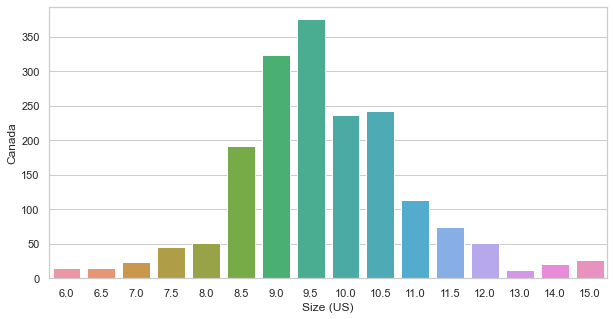

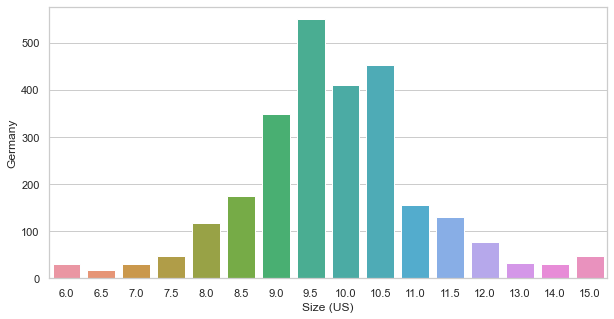

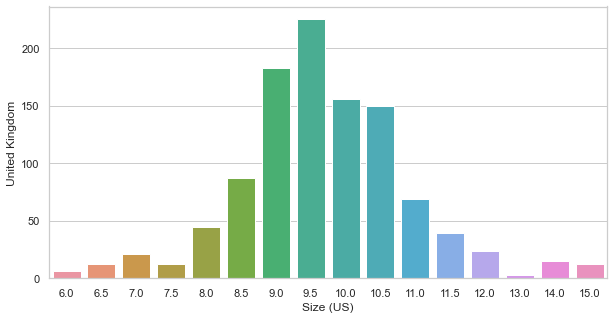

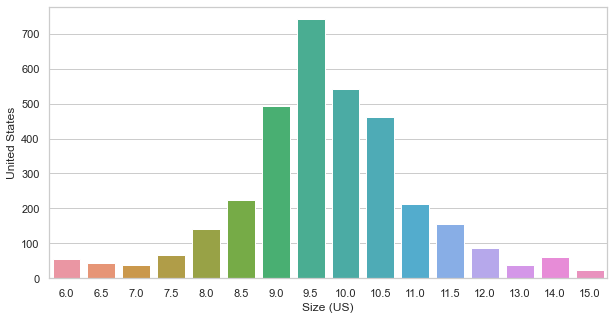

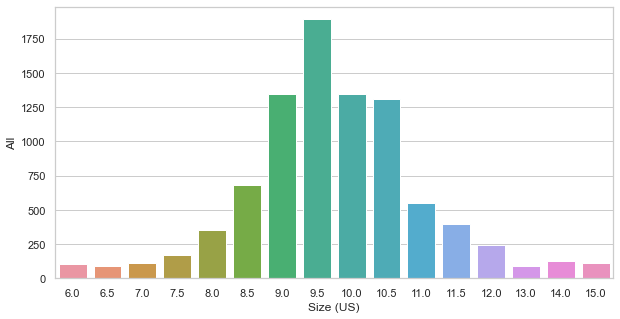

In [35]:
# plotting the results
cols = ['Canada','Germany','United Kingdom','United States','All']
ploting = df_freq_male.iloc[:-1,:]
for col in cols:
    plt.figure(figsize = (10,5))
    sns.barplot(data = ploting
            ,x = 'Size (US)'
            ,y = ploting[col])

In [36]:
# Task 2
# frequency distribuiton table for female 
df_freq_female = pd.pivot_table(data = df[df['Gender'] == 'Female']
                        ,index = 'Size (US)'
                        ,columns = 'Country'
                        ,values = 'InvoiceNo'
                        ,aggfunc = 'count'
                        ,margins = True).reset_index()
df_freq_female.head()

Country,Size (US),Canada,Germany,United Kingdom,United States,All
0,4.5,6,9,15,21,51
1,5.0,6,12,9,9,36
2,5.5,6,9,6,42,63
3,6.0,21,15,12,33,81
4,6.5,51,84,24,93,252


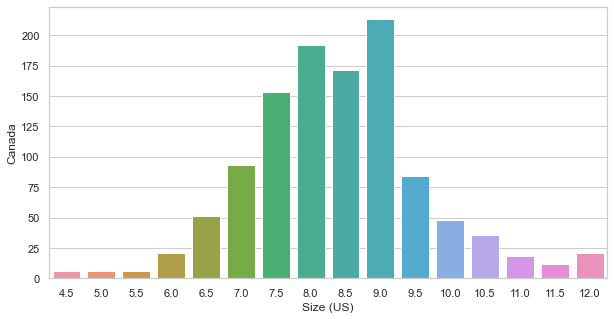

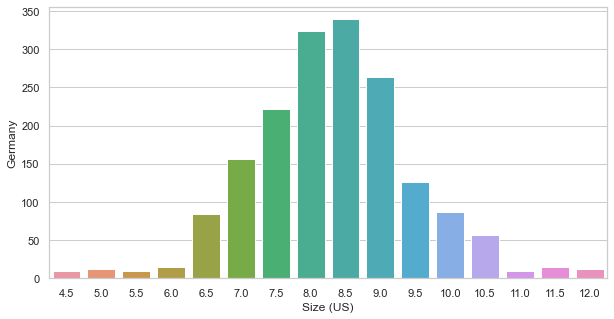

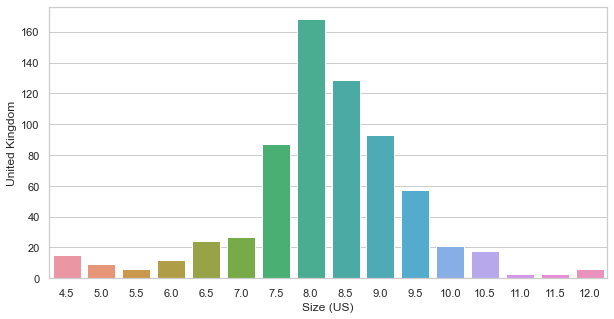

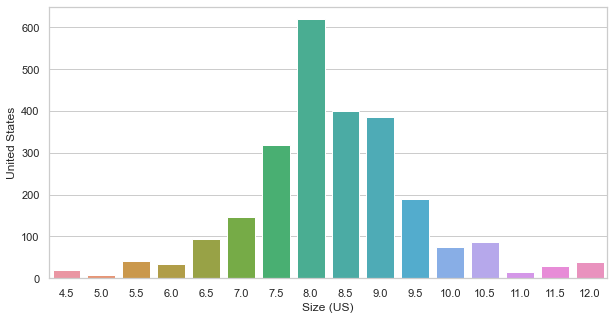

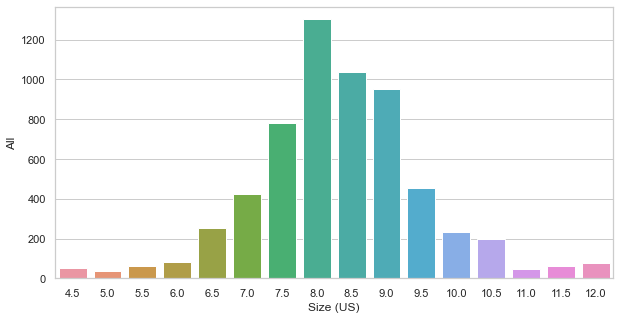

In [37]:
# plotting the results
cols = ['Canada','Germany','United Kingdom','United States','All']
ploting = df_freq_female.iloc[:-1,:]
for col in cols:
    plt.figure(figsize = (10,5))
    sns.barplot(data = ploting
            ,x = 'Size (US)'
            ,y = ploting[col])

In [38]:
# frequency distributiont tables by size and month for male in 2016
df_freq_male_month = pd.pivot_table(data = df[(df['Gender'] == 'Male')&(df['Country'] == 'United States')&(df['Unnamed: 11'] == 2016)]
                                   ,index = 'Size (US)'
                                   ,columns = 'Month'
                                   ,values = 'InvoiceNo'
                                   ,aggfunc = 'count'
                                   ,fill_value = 0
                                   ,margins = True).reset_index()
df_freq_male_month.columns = df_freq_male_month.columns.astype(str)
df_freq_male_month.head()

Month,Size (US),1,2,3,4,5,6,7,8,9,10,11,12,All
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,35
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,20
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,20
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,38
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,73


In [39]:
# calculating mean values
df_freq_male_month['Mean'] = df_freq_male_month.loc[:,['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12']].apply(lambda x: x.mean(), axis = 1)
df_freq_male_month.head()

Month,Size (US),1,2,3,4,5,6,7,8,9,10,11,12,All,Mean
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,35,2.916667
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,20,1.666667
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,20,1.666667
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,38,3.166667
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,73,6.083333


In [40]:
# calculating standard error
df_freq_male_month['Standard_Error'] = df_freq_male_month.loc[:,['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12']].apply(lambda x: x.sem(), axis = 1)
df_freq_male_month.head()

Month,Size (US),1,2,3,4,5,6,7,8,9,10,11,12,All,Mean,Standard_Error
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,35,2.916667,0.514315
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,20,1.666667,0.555050
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,20,1.666667,0.607196
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,38,3.166667,0.694495
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,73,6.083333,0.882990


In [41]:
# number of observations 
n = df_freq_male_month.loc[:,['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12']].shape[1]
print('Sample size: ', n)
# degrees of freedom
dof = n-1
print('Degrees of freedom: ', dof)
# confidence interval
ci = .95
print('Confidence interval: ', ci)
# two sided alpha level
alpha = (1-ci)/2
print('Alpha: ', alpha)
# t critical value
t_critical = 2.201
# t critical with stats
t_critical_stats = stats.t.ppf(alpha, dof)
print('t-critical: {},{}'.format(t_critical,t_critical_stats))

Sample size:  12
Degrees of freedom:  11
Confidence interval:  0.95
Alpha:  0.025000000000000022
t-critical: 2.201,-2.200985160082949


In [42]:
# calculating margin of error
df_freq_male_month['ME'] = df_freq_male_month['Standard_Error'].apply(lambda x: x*t_critical)
df_freq_male_month.head()

Month,Size (US),1,2,3,4,5,6,7,8,9,10,11,12,All,Mean,Standard_Error,ME
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,35,2.916667,0.514315,1.132008
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,20,1.666667,0.555050,1.221666
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,20,1.666667,0.607196,1.336438
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,38,3.166667,0.694495,1.528583
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,73,6.083333,0.882990,1.943461


In [43]:
# calculating confidence intervals
df_freq_male_month['CI_Low'] =  df_freq_male_month.apply(lambda  x: x['Mean'] - x['ME'], axis = 1)
df_freq_male_month['CI_High'] = df_freq_male_month.apply(lambda  x: x['Mean'] + x['ME'], axis = 1)
df_freq_male_month.head()

Month,Size (US),1,2,3,4,5,6,7,8,9,10,11,12,All,Mean,Standard_Error,ME,CI_Low,CI_High
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,35,2.916667,0.514315,1.132008,1.784659,4.048675
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,20,1.666667,0.555050,1.221666,0.445001,2.888332
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,20,1.666667,0.607196,1.336438,0.330228,3.003105
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,38,3.166667,0.694495,1.528583,1.638083,4.695250
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,73,6.083333,0.882990,1.943461,4.139872,8.026795


In [44]:
# conclusion is to take number of shoes with confidence interval high 
df_freq_male_month['Number_Of_Pairs_Required'] = df_freq_male_month['CI_High'].apply(lambda x: round(x))
df_freq_male_month.head()

Month,Size (US),1,2,3,4,5,6,7,8,9,10,11,12,All,Mean,Standard_Error,ME,CI_Low,CI_High,Number_Of_Pairs_Required
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,35,2.916667,0.514315,1.132008,1.784659,4.048675,4
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,20,1.666667,0.555050,1.221666,0.445001,2.888332,3
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,20,1.666667,0.607196,1.336438,0.330228,3.003105,3
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,38,3.166667,0.694495,1.528583,1.638083,4.695250,5
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,73,6.083333,0.882990,1.943461,4.139872,8.026795,8


Text(0.5, 1.0, 'Number of pairs required for specific male shoe size')

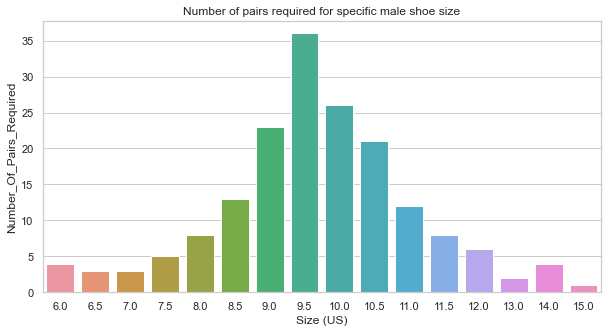

In [45]:
# creating plot
plt.figure(figsize = (10,5))
sns.barplot(data = df_freq_male_month.iloc[:-1,:]
           ,x = 'Size (US)'
           ,y = 'Number_Of_Pairs_Required').set_title('Number of pairs required for specific male shoe size')

In [46]:
# frequency distributiont tables by size and month for two german shops in 2016
df_ger1 = pd.pivot_table(data = df[(df['Gender'] == 'Female')&(df['Country'] == 'Germany')&(df['Unnamed: 11'] == 2016)&(df['Shop'] == 'GER1')]
                                   ,index = 'Size (US)'
                                   ,columns = 'Month'
                                   ,values = 'InvoiceNo'
                                   ,aggfunc = 'count'
                                   ,fill_value = 0
                                   ,margins = True).reset_index()
df_ger1.columns = df_ger1.columns.astype(str)
df_ger1 = df_ger1.add_prefix('Ger1_')   
df_ger1.head()

Month,Ger1_Size (US),Ger1_1,Ger1_2,Ger1_3,Ger1_4,Ger1_5,Ger1_6,Ger1_7,Ger1_8,Ger1_9,Ger1_10,Ger1_11,Ger1_12,Ger1_All
0,4.5,0,0,0,0,1,3,0,0,0,0,1,0,5
1,5.0,0,0,0,0,0,0,2,0,0,0,0,0,2
2,5.5,0,0,0,0,0,0,0,0,0,0,1,0,1
3,6.0,0,2,0,0,0,0,0,0,0,0,0,0,2
4,6.5,3,3,1,2,1,0,2,0,2,1,3,4,22


In [47]:
# frequency distributiont tables by size and month for two german shops in 2016
df_ger2 = pd.pivot_table(data = df[(df['Gender'] == 'Female')&(df['Country'] == 'Germany')&(df['Unnamed: 11'] == 2016)&(df['Shop'] == 'GER2')]
                                   ,index = 'Size (US)'
                                   ,columns = 'Month'
                                   ,values = 'InvoiceNo'
                                   ,aggfunc = 'count'
                                   ,fill_value = 0
                                   ,margins = True).reset_index()
df_ger2.columns = df_ger2.columns.astype(str)
df_ger2 = df_ger2.add_prefix('Ger2_')
df_ger2.head()

Month,Ger2_Size (US),Ger2_1,Ger2_2,Ger2_3,Ger2_4,Ger2_5,Ger2_6,Ger2_7,Ger2_8,Ger2_9,Ger2_10,Ger2_11,Ger2_12,Ger2_All
0,4.5,0,0,0,0,0,0,0,0,0,1,0,0,1
1,5.0,0,0,0,0,0,0,0,2,0,0,0,0,2
2,5.5,0,0,0,0,0,0,0,1,0,2,0,1,4
3,6.0,0,1,3,1,2,0,0,0,0,0,0,0,7
4,6.5,2,0,2,1,1,2,0,1,2,1,3,0,15


In [48]:
# merging two german shops
df_shops = df_ger1.merge(df_ger2
                        ,left_index = True
                        ,right_index = True)
df_shops.head()

Month,Ger1_Size (US),Ger1_1,Ger1_2,Ger1_3,Ger1_4,Ger1_5,Ger1_6,Ger1_7,Ger1_8,Ger1_9,...,Ger2_4,Ger2_5,Ger2_6,Ger2_7,Ger2_8,Ger2_9,Ger2_10,Ger2_11,Ger2_12,Ger2_All
0,4.5,0,0,0,0,1,3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,5.0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,2,0,0,0,0,2
2,5.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,0,1,4
3,6.0,0,2,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,0,0,7
4,6.5,3,3,1,2,1,0,2,0,2,...,1,1,2,0,1,2,1,3,0,15


In [49]:
# calculating mean values
df_shops['Mean_Ger1'] = df_shops.loc[:,['Ger1_1', 'Ger1_2', 'Ger1_3', 'Ger1_4', 'Ger1_5', 'Ger1_6', 'Ger1_7', 'Ger1_8', 'Ger1_9', 'Ger1_10', 'Ger1_11','Ger1_12']].apply(lambda x: x.mean(), axis = 1)
# calculating mean values
df_shops['Mean_Ger2'] = df_shops.loc[:,['Ger2_1', 'Ger2_2', 'Ger2_3', 'Ger2_4', 'Ger2_5', 'Ger2_6', 'Ger2_7', 'Ger2_8', 'Ger2_9', 'Ger2_10', 'Ger2_11','Ger2_12']].apply(lambda x: x.mean(), axis = 1)
# calculating mean difference
df_shops['Mean_Diff'] = df_shops.apply(lambda x: x['Mean_Ger1'] - x['Mean_Ger2'], axis = 1)
df_shops.head()

Month,Ger1_Size (US),Ger1_1,Ger1_2,Ger1_3,Ger1_4,Ger1_5,Ger1_6,Ger1_7,Ger1_8,Ger1_9,...,Ger2_7,Ger2_8,Ger2_9,Ger2_10,Ger2_11,Ger2_12,Ger2_All,Mean_Ger1,Mean_Ger2,Mean_Diff
0,4.5,0,0,0,0,1,3,0,0,0,...,0,0,0,1,0,0,1,0.416667,0.083333,0.333333
1,5.0,0,0,0,0,0,0,2,0,0,...,0,2,0,0,0,0,2,0.166667,0.166667,0.000000
2,5.5,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,1,4,0.083333,0.333333,-0.250000
3,6.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0.166667,0.583333,-0.416667
4,6.5,3,3,1,2,1,0,2,0,2,...,0,1,2,1,3,0,15,1.833333,1.250000,0.583333


In [50]:
# calculating sample variance
df_shops['Sample_Variance_Ger1'] = df_shops.loc[:,['Ger1_1', 'Ger1_2', 'Ger1_3', 'Ger1_4', 'Ger1_5', 'Ger1_6', 'Ger1_7', 'Ger1_8', 'Ger1_9', 'Ger1_10', 'Ger1_11','Ger1_12']].apply(lambda x: x.std()**2, axis = 1)
df_shops['Sample_Variance_Ger2'] = df_shops.loc[:,['Ger2_1', 'Ger2_2', 'Ger2_3', 'Ger2_4', 'Ger2_5', 'Ger2_6', 'Ger2_7', 'Ger2_8', 'Ger2_9', 'Ger2_10', 'Ger2_11','Ger2_12']].apply(lambda x: x.std()**2, axis = 1)
df_shops.head()

Month,Ger1_Size (US),Ger1_1,Ger1_2,Ger1_3,Ger1_4,Ger1_5,Ger1_6,Ger1_7,Ger1_8,Ger1_9,...,Ger2_9,Ger2_10,Ger2_11,Ger2_12,Ger2_All,Mean_Ger1,Mean_Ger2,Mean_Diff,Sample_Variance_Ger1,Sample_Variance_Ger2
0,4.5,0,0,0,0,1,3,0,0,0,...,0,1,0,0,1,0.416667,0.083333,0.333333,0.810606,0.083333
1,5.0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,2,0.166667,0.166667,0.000000,0.333333,0.333333
2,5.5,0,0,0,0,0,0,0,0,0,...,0,2,0,1,4,0.083333,0.333333,-0.250000,0.083333,0.424242
3,6.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,7,0.166667,0.583333,-0.416667,0.333333,0.992424
4,6.5,3,3,1,2,1,0,2,0,2,...,2,1,3,0,15,1.833333,1.250000,0.583333,1.606061,0.931818


In [51]:
# sample size
n_ger1 = df_shops.loc[:,['Ger1_1', 'Ger1_2', 'Ger1_3', 'Ger1_4', 'Ger1_5', 'Ger1_6', 'Ger1_7', 'Ger1_8', 'Ger1_9', 'Ger1_10', 'Ger1_11','Ger1_12']].shape[1]
n_ger2 = df_shops.loc[:,['Ger2_1', 'Ger2_2', 'Ger2_3', 'Ger2_4', 'Ger2_5', 'Ger2_6', 'Ger2_7', 'Ger2_8', 'Ger2_9', 'Ger2_10', 'Ger2_11','Ger2_12']].shape[1]
n = n_ger1+n_ger2
print('Sample size: ', n)
# degrees of freedom
dof_ger1 = n_ger1 - 1
dof_ger2 = n_ger2 - 1
dof = dof_ger1 + dof_ger2
print('Degrees of freedom: ', dof)
# confidence interval 
ci = .95
print('Confidence interval: ', ci)
# two sided alpha level
alpha = (1-ci)/2
print('Alpha level: ', alpha)

Sample size:  24
Degrees of freedom:  22
Confidence interval:  0.95
Alpha level:  0.025000000000000022


In [52]:
# calculated pooled variance
df_shops['Pooled_Variance'] = df_shops.apply(lambda x: (dof_ger1 * x['Sample_Variance_Ger1'] + dof_ger2 * x['Sample_Variance_Ger2'])/dof, axis = 1)
df_shops.head()

Month,Ger1_Size (US),Ger1_1,Ger1_2,Ger1_3,Ger1_4,Ger1_5,Ger1_6,Ger1_7,Ger1_8,Ger1_9,...,Ger2_10,Ger2_11,Ger2_12,Ger2_All,Mean_Ger1,Mean_Ger2,Mean_Diff,Sample_Variance_Ger1,Sample_Variance_Ger2,Pooled_Variance
0,4.5,0,0,0,0,1,3,0,0,0,...,1,0,0,1,0.416667,0.083333,0.333333,0.810606,0.083333,0.446970
1,5.0,0,0,0,0,0,0,2,0,0,...,0,0,0,2,0.166667,0.166667,0.000000,0.333333,0.333333,0.333333
2,5.5,0,0,0,0,0,0,0,0,0,...,2,0,1,4,0.083333,0.333333,-0.250000,0.083333,0.424242,0.253788
3,6.0,0,2,0,0,0,0,0,0,0,...,0,0,0,7,0.166667,0.583333,-0.416667,0.333333,0.992424,0.662879
4,6.5,3,3,1,2,1,0,2,0,2,...,1,3,0,15,1.833333,1.250000,0.583333,1.606061,0.931818,1.268939


In [53]:
# checking t critical value for 22 dof and alpha .025
t_critical = stats.t.ppf(alpha, dof)
print('T-critical: ', t_critical)

T-critical:  -2.0738730679040147


In [54]:
# calculating pooled standard error
df_shops['Standard_Error'] = df_shops['Pooled_Variance'].apply(lambda x: math.sqrt((x/n_ger1)+(x/n_ger2)))
df_shops.head()

Month,Ger1_Size (US),Ger1_1,Ger1_2,Ger1_3,Ger1_4,Ger1_5,Ger1_6,Ger1_7,Ger1_8,Ger1_9,...,Ger2_11,Ger2_12,Ger2_All,Mean_Ger1,Mean_Ger2,Mean_Diff,Sample_Variance_Ger1,Sample_Variance_Ger2,Pooled_Variance,Standard_Error
0,4.5,0,0,0,0,1,3,0,0,0,...,0,0,1,0.416667,0.083333,0.333333,0.810606,0.083333,0.446970,0.272938
1,5.0,0,0,0,0,0,0,2,0,0,...,0,0,2,0.166667,0.166667,0.000000,0.333333,0.333333,0.333333,0.235702
2,5.5,0,0,0,0,0,0,0,0,0,...,0,1,4,0.083333,0.333333,-0.250000,0.083333,0.424242,0.253788,0.205665
3,6.0,0,2,0,0,0,0,0,0,0,...,0,0,7,0.166667,0.583333,-0.416667,0.333333,0.992424,0.662879,0.332385
4,6.5,3,3,1,2,1,0,2,0,2,...,3,0,15,1.833333,1.250000,0.583333,1.606061,0.931818,1.268939,0.459880


In [55]:
# calculating margin of error
df_shops['ME'] = df_shops['Standard_Error'].apply(lambda x: -1*t_critical * x)
df_shops.head()

Month,Ger1_Size (US),Ger1_1,Ger1_2,Ger1_3,Ger1_4,Ger1_5,Ger1_6,Ger1_7,Ger1_8,Ger1_9,...,Ger2_12,Ger2_All,Mean_Ger1,Mean_Ger2,Mean_Diff,Sample_Variance_Ger1,Sample_Variance_Ger2,Pooled_Variance,Standard_Error,ME
0,4.5,0,0,0,0,1,3,0,0,0,...,0,1,0.416667,0.083333,0.333333,0.810606,0.083333,0.446970,0.272938,0.566038
1,5.0,0,0,0,0,0,0,2,0,0,...,0,2,0.166667,0.166667,0.000000,0.333333,0.333333,0.333333,0.235702,0.488817
2,5.5,0,0,0,0,0,0,0,0,0,...,1,4,0.083333,0.333333,-0.250000,0.083333,0.424242,0.253788,0.205665,0.426523
3,6.0,0,2,0,0,0,0,0,0,0,...,0,7,0.166667,0.583333,-0.416667,0.333333,0.992424,0.662879,0.332385,0.689324
4,6.5,3,3,1,2,1,0,2,0,2,...,0,15,1.833333,1.250000,0.583333,1.606061,0.931818,1.268939,0.459880,0.953733


In [56]:
# calculating confidence intervals
df_shops['CI_Low'] = df_shops.apply(lambda x: x['Mean_Diff']-x['ME'], axis = 1)
df_shops['CI_High'] = df_shops.apply(lambda x: x['Mean_Diff']+x['ME'], axis = 1)
df_shops.head()

Month,Ger1_Size (US),Ger1_1,Ger1_2,Ger1_3,Ger1_4,Ger1_5,Ger1_6,Ger1_7,Ger1_8,Ger1_9,...,Mean_Ger1,Mean_Ger2,Mean_Diff,Sample_Variance_Ger1,Sample_Variance_Ger2,Pooled_Variance,Standard_Error,ME,CI_Low,CI_High
0,4.5,0,0,0,0,1,3,0,0,0,...,0.416667,0.083333,0.333333,0.810606,0.083333,0.446970,0.272938,0.566038,-0.232705,0.899371
1,5.0,0,0,0,0,0,0,2,0,0,...,0.166667,0.166667,0.000000,0.333333,0.333333,0.333333,0.235702,0.488817,-0.488817,0.488817
2,5.5,0,0,0,0,0,0,0,0,0,...,0.083333,0.333333,-0.250000,0.083333,0.424242,0.253788,0.205665,0.426523,-0.676523,0.176523
3,6.0,0,2,0,0,0,0,0,0,0,...,0.166667,0.583333,-0.416667,0.333333,0.992424,0.662879,0.332385,0.689324,-1.105991,0.272658
4,6.5,3,3,1,2,1,0,2,0,2,...,1.833333,1.250000,0.583333,1.606061,0.931818,1.268939,0.459880,0.953733,-0.370400,1.537067


<AxesSubplot:xlabel='Ger1_Size (US)', ylabel='CI_High'>

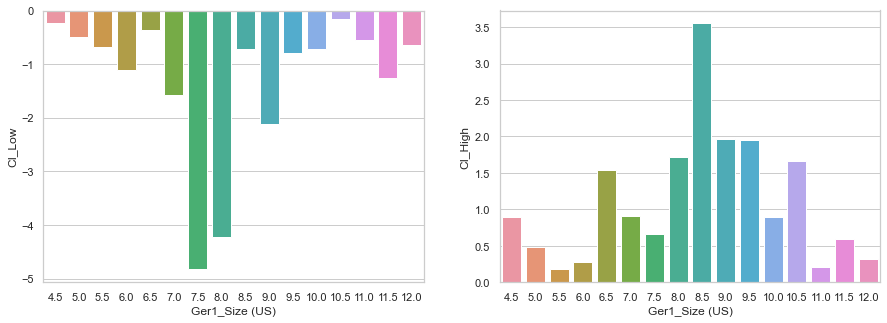

In [57]:
'''
For a single shoe size (marked), we can clearly see that one shop outperforms the other.		
However, our confidence is lower. 		
This shows you that the level of confidence does make a difference. 		
Also notice that the intervals are narrower.		
Overall the two shops are extremely similar in terms of sales.
'''
# checking confidence intervals
fig, axes = plt.subplots(1,2, figsize = (15,5))
sns.barplot(ax = axes[0]
            ,data = df_shops.iloc[:-1,:]
            ,x = 'Ger1_Size (US)'
            ,y = 'CI_Low')
sns.barplot(ax = axes[1]
            ,data = df_shops.iloc[:-1,:]
            ,x = 'Ger1_Size (US)'
            ,y = 'CI_High')